In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_iris, load_digits
from sklearn.naive_bayes import GaussianNB
from pycalib.models import CalibratedModel
from dirichletcal import FullDirichletCalibrator
from sklearn.model_selection import train_test_split

# Datasets

Here we generate 3 syntethic datasets that will be used to demonstrate some visualisation tools.

In [2]:
from sklearn.datasets import make_classification
dataset_binary = make_classification(n_classes=2, n_samples=10000,
                                    n_clusters_per_class=3,
                                    n_features=10,
                                    n_informative=5,
                                    n_redundant=3,
                                    random_state=42)

dataset_ternary = make_classification(n_classes=3, n_samples=10000,
                                    n_clusters_per_class=3,
                                    n_features=10,
                                    n_informative=5,
                                    n_redundant=3,
                                    random_state=42)

dataset_senary = make_classification(n_classes=6, n_samples=10000,
                                    n_clusters_per_class=3,
                                    n_features=10,
                                    n_informative=5,
                                    n_redundant=3,
                                    random_state=42)

# Reliability diagram

We will first train a classifier, and a calibrator on top of it. We will then visualise the reliability diagram.

## Binary (only positive class)

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


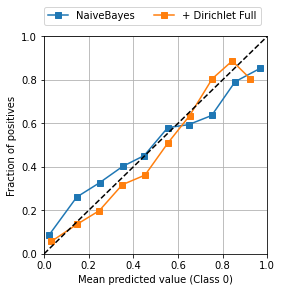

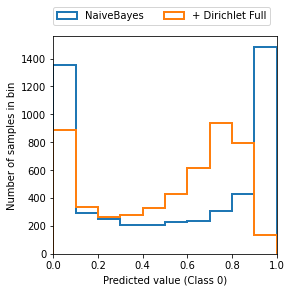

In [3]:
from pycalib.visualisations import plot_reliability_diagram

x, y = dataset_binary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
clf = GaussianNB()
clf.fit(x_train, y_train)
cal = CalibratedModel(clf, FullDirichletCalibrator())
cal.fit(x_train, y_train)
scores_list = [clf.predict_proba(x_test),
          cal.predict_proba(x_test)]

_ = plot_reliability_diagram(y_test, scores_list, legend=('NaiveBayes', '+ Dirichlet Full'), histogram=True)

## Multiclass (one per class)

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2 3 4 5] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


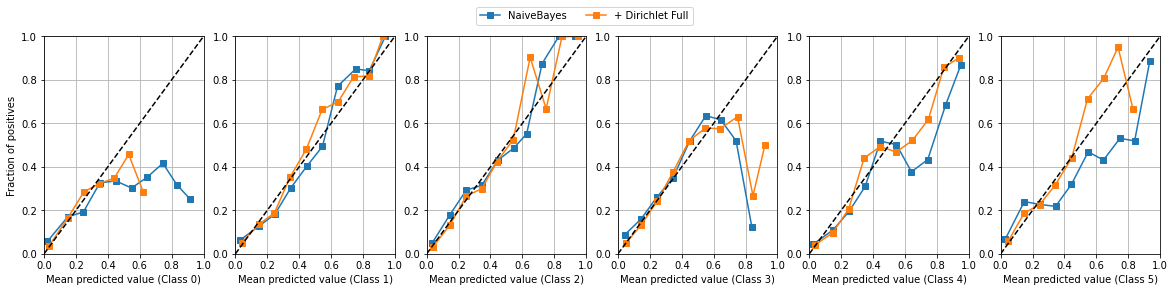

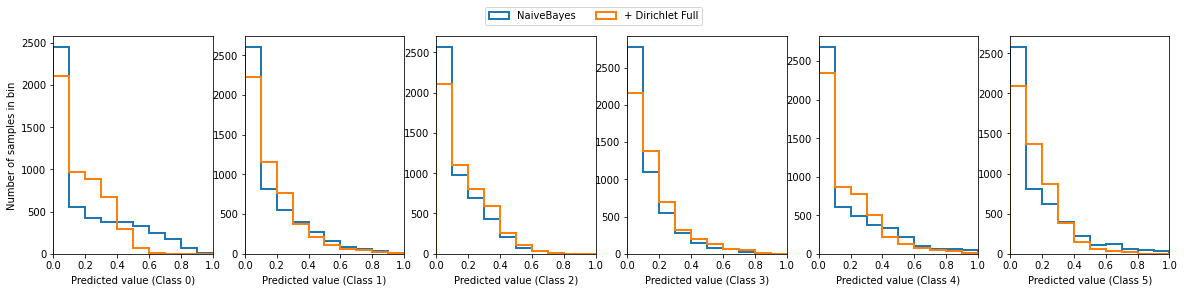

In [4]:
x, y = dataset_senary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
clf = GaussianNB()
clf.fit(x_train, y_train)
cal = CalibratedModel(clf, FullDirichletCalibrator())
cal.fit(x_train, y_train)
scores_list = [clf.predict_proba(x_test),
          cal.predict_proba(x_test)]

_ = plot_reliability_diagram(y_test, scores_list, legend=('NaiveBayes', '+ Dirichlet Full'), histogram=True)

# Reliability Diagram gaps

## Binary

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


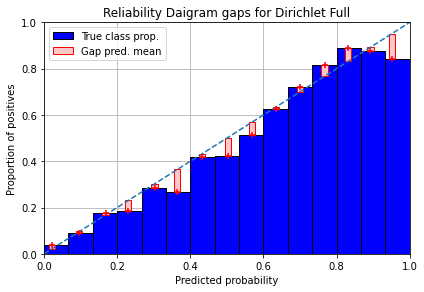

In [5]:
from pycalib.visualisations import plot_binary_reliability_diagram_gaps

x, y = dataset_binary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
cal = CalibratedModel(GaussianNB(), FullDirichletCalibrator())
cal.fit(x_train, y_train)

est_scores = cal.predict_proba(x_test)
fig, ax = plot_binary_reliability_diagram_gaps(y_test, est_scores, n_bins=15)
_ = ax.set_title('Reliability Daigram gaps for Dirichlet Full')

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2 3 4 5] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


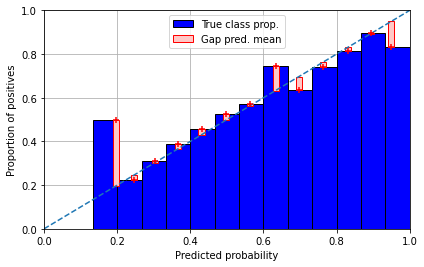

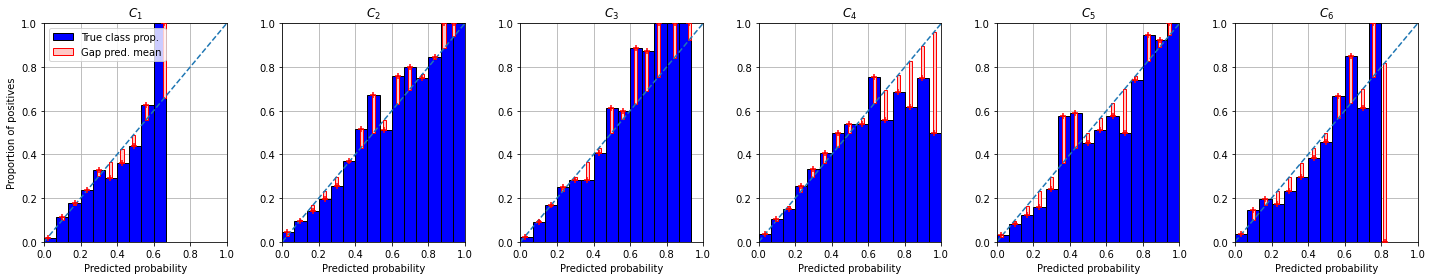

In [6]:
from pycalib.visualisations import plot_multiclass_reliability_diagram_gaps

from sklearn.preprocessing import OneHotEncoder

x, y = dataset_senary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
cal = CalibratedModel(GaussianNB(), FullDirichletCalibrator())
cal.fit(x_train, y_train)

probas = cal.predict_proba(x_test)
_ = plot_multiclass_reliability_diagram_gaps(y_test, probas, per_class=False)


_ = plot_multiclass_reliability_diagram_gaps(y_test, probas,per_class=True)

# Calibration maps

These plots show the transformation that the calibrator is performing to the classifier scores. This is a C to C function where C is the number of classes. In the binary case it is comonly shown for the positive class

## Binary calibration maps

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


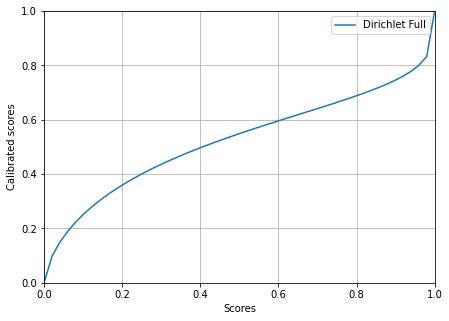

In [7]:
import matplotlib.pyplot as plt

x, y = dataset_binary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
cal = CalibratedModel(GaussianNB(), FullDirichletCalibrator())
cal.fit(x_train, y_train)

scores_linspace = np.linspace(0, 1, 50)
scores_linspace = np.vstack((1-scores_linspace, scores_linspace)).T
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
calibrated = cal.calibrator.predict_proba(scores_linspace)
ax.plot(scores_linspace[:, 1], calibrated[:, 1], label='Dirichlet Full')
ax.legend()
ax.set_xlabel('Scores')
ax.set_ylabel('Calibrated scores')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid()

## 2D slices of Ternary Calibration maps

/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/miquel/git/uob/classifier-calibration/hands_on/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


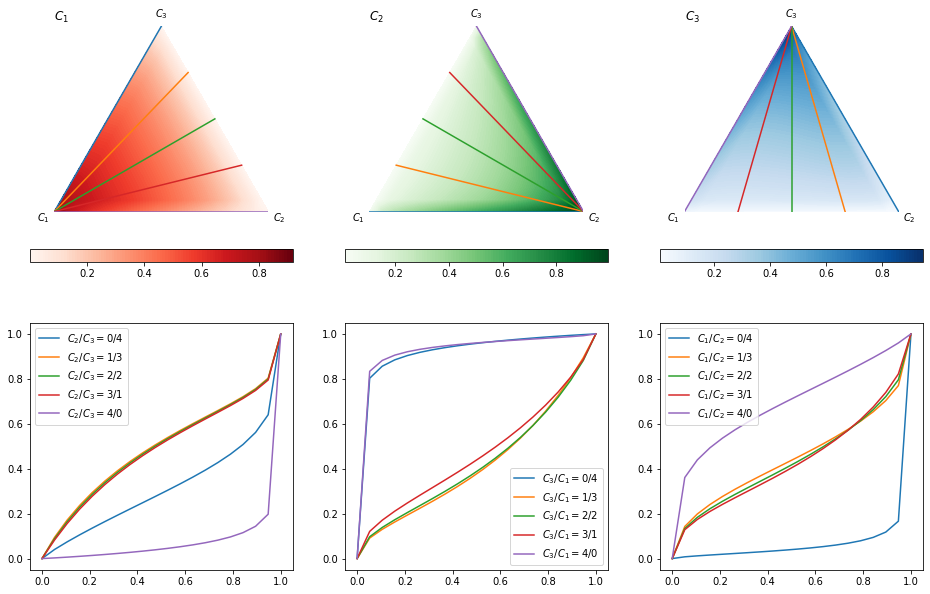

In [8]:
x, y = dataset_ternary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
cal = CalibratedModel(GaussianNB(), FullDirichletCalibrator())
cal.fit(x_train, y_train)

from pycalib.visualisations.ternary import draw_func_contours, plot_converging_lines_pvalues, get_converging_lines

c_mark = [{'color':[.5, 0, 0], 'marker':'.', 'label':r'$C_1$', 'cmap':'Reds'},
          {'color':[0, .5, 0], 'marker':'x', 'label':r'$C_2$', 'cmap':'Greens'},
          {'color':[0, 0, .5], 'marker':'+', 'label':r'$C_3$', 'cmap':'Blues'}]


fig = plt.figure(figsize=(16, 10))
for i, c in enumerate(['C1', 'C2', 'C3']):
    ax = fig.add_subplot(2, 3, i+1)

    ax.set_title('$C_{}$'.format(i+1), loc='left')

    function = lambda x: cal.calibrator.predict_proba(x.reshape(1,-1))[0][i]
    draw_func_contours(function, labels='auto', fig=fig, ax=ax, cmap=c_mark[i]['cmap'],
                       nlevels=100, subdiv=4, draw_lines=5, class_index=i)

    ax2 = fig.add_subplot(2, 3, 3+i+1)
    lines = get_converging_lines(num_lines=5, mesh_precision=20, class_index=i)
    plot_converging_lines_pvalues(function, lines, i, ax2)

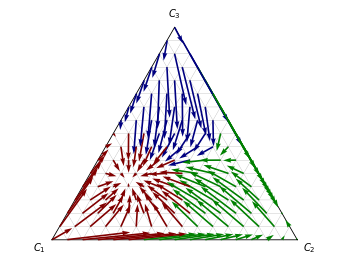

In [9]:
from pycalib.visualisations.barycentric import draw_calibration_map
from pycalib.visualisations.barycentric import get_mesh_bc
from pycalib.models import CalibratedModel

from dirichletcal import FullDirichletCalibrator, FixedDiagonalDirichletCalibrator, DirichletCalibrator

P_bc_grid = get_mesh_bc(subdiv=4)

calibrated = cal.calibrator.predict_proba(P_bc_grid)
color = [c_mark[i]['color'] for i in calibrated.argmax(axis=1).astype(int)]
_ = draw_calibration_map(P_bc_grid, calibrated, color=color,  subdiv=4)